In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import DistanceMetric

### 1. Data Acquisition

#### Describe how you selected the images with respect to the conditions of the detection/classification methods

Since the PCA method compares the pixel of the original image to the eigenfaces, the light intensity, face orientation and scale of the training images should be similar to maximize accuracy. However, this is rather hard to do since we are obtaining images from the internet and we may not be able to find 10 similar training images for each person. 

If the training images can be taken using a camera instead of directly from the Internet, we would have more control over the factors that may affect the accuracy of the detection algorithm.

With that been said, the scale of the face in all training images all kept to be similar, but the face orientation and light intensity (especially) are rather hard to control.

### 2. Eigenvector Representation
#### 2.1-Use PCA to find the eigenvector representation of your training data (5 points)

In [2]:
# load training images
Annie1_path = './Annie/Annie1.png'
Annie2_path = './Annie/Annie2.png'
Annie3_path = './Annie/Annie3.png'
Annie4_path = './Annie/Annie4.png'
Annie5_path = './Annie/Annie5.png'
Annie6_path = './Annie/Annie6.png'
Annie7_path = './Annie/Annie7.png'
Annie8_path = './Annie/Annie8.png'
Annie9_path = './Annie/Annie9.png'
Annie10_path = './Annie/Annie10.png'

Annie1 = cv2.imread(Annie1_path, cv2.IMREAD_GRAYSCALE);
Annie2 = cv2.imread(Annie2_path, cv2.IMREAD_GRAYSCALE);
Annie3 = cv2.imread(Annie3_path, cv2.IMREAD_GRAYSCALE);
Annie4 = cv2.imread(Annie4_path, cv2.IMREAD_GRAYSCALE);
Annie5 = cv2.imread(Annie5_path, cv2.IMREAD_GRAYSCALE);
Annie6 = cv2.imread(Annie6_path, cv2.IMREAD_GRAYSCALE);
Annie7 = cv2.imread(Annie7_path, cv2.IMREAD_GRAYSCALE);
Annie8 = cv2.imread(Annie8_path, cv2.IMREAD_GRAYSCALE);
Annie9 = cv2.imread(Annie9_path, cv2.IMREAD_GRAYSCALE);
Annie10 = cv2.imread(Annie10_path, cv2.IMREAD_GRAYSCALE);

Annie1 = cv2.resize(Annie1, (80, 80))
Annie2 = cv2.resize(Annie2,(80,80))
Annie3 = cv2.resize(Annie3, (80, 80))
Annie4 = cv2.resize(Annie4,(80,80))
Annie5 = cv2.resize(Annie5, (80, 80))
Annie6 = cv2.resize(Annie6,(80,80))
Annie7 = cv2.resize(Annie7, (80, 80))
Annie8 = cv2.resize(Annie8,(80,80))
Annie9 = cv2.resize(Annie9, (80, 80))
Annie10 = cv2.resize(Annie10,(80,80))


Shirley1_path = './Shirley/Shirley1.png'
Shirley2_path = './Shirley/Shirley2.png'
Shirley3_path = './Shirley/Shirley3.png'
Shirley4_path = './Shirley/Shirley4.png'
Shirley5_path = './Shirley/Shirley5.png'
Shirley6_path = './Shirley/Shirley6.png'
Shirley7_path = './Shirley/Shirley7.png'
Shirley8_path = './Shirley/Shirley8.png'
Shirley9_path = './Shirley/Shirley9.png'
Shirley10_path = './Shirley/Shirley10.png'

Shirley1 = cv2.imread(Shirley1_path, cv2.IMREAD_GRAYSCALE);
Shirley2 = cv2.imread(Shirley2_path, cv2.IMREAD_GRAYSCALE);
Shirley3 = cv2.imread(Shirley3_path, cv2.IMREAD_GRAYSCALE);
Shirley4 = cv2.imread(Shirley4_path, cv2.IMREAD_GRAYSCALE);
Shirley5 = cv2.imread(Shirley5_path, cv2.IMREAD_GRAYSCALE);
Shirley6 = cv2.imread(Shirley6_path, cv2.IMREAD_GRAYSCALE);
Shirley7 = cv2.imread(Shirley7_path, cv2.IMREAD_GRAYSCALE);
Shirley8 = cv2.imread(Shirley8_path, cv2.IMREAD_GRAYSCALE);
Shirley9 = cv2.imread(Shirley9_path, cv2.IMREAD_GRAYSCALE);
Shirley10 = cv2.imread(Shirley10_path, cv2.IMREAD_GRAYSCALE);

Shirley1 = cv2.resize(Shirley1,(80,80))
Shirley2 = cv2.resize(Shirley2,(80,80))
Shirley3 = cv2.resize(Shirley3,(80,80))
Shirley4 = cv2.resize(Shirley4,(80,80))
Shirley5 = cv2.resize(Shirley5,(80,80))
Shirley6 = cv2.resize(Shirley6,(80,80))
Shirley7 = cv2.resize(Shirley7,(80,80))
Shirley8 = cv2.resize(Shirley8,(80,80))
Shirley9 = cv2.resize(Shirley9,(80,80))
Shirley10 = cv2.resize(Shirley10,(80,80))



Britta1_path = './Britta/Britta1.png'
Britta2_path = './Britta/Britta2.png'
Britta3_path = './Britta/Britta3.png'
Britta4_path = './Britta/Britta4.png'
Britta5_path = './Britta/Britta5.png'
Britta6_path = './Britta/Britta6.png'
Britta7_path = './Britta/Britta7.png'
Britta8_path = './Britta/Britta8.png'
Britta9_path = './Britta/Britta9.png'
Britta10_path = './Britta/Britta10.png'

Britta1 = cv2.imread(Britta1_path, cv2.IMREAD_GRAYSCALE);
Britta2 = cv2.imread(Britta2_path, cv2.IMREAD_GRAYSCALE);
Britta3 = cv2.imread(Britta3_path, cv2.IMREAD_GRAYSCALE);
Britta4 = cv2.imread(Britta4_path, cv2.IMREAD_GRAYSCALE);
Britta5 = cv2.imread(Britta5_path, cv2.IMREAD_GRAYSCALE);
Britta6 = cv2.imread(Britta6_path, cv2.IMREAD_GRAYSCALE);
Britta7 = cv2.imread(Britta7_path, cv2.IMREAD_GRAYSCALE);
Britta8 = cv2.imread(Britta8_path, cv2.IMREAD_GRAYSCALE);
Britta9 = cv2.imread(Britta9_path, cv2.IMREAD_GRAYSCALE);
Britta10 = cv2.imread(Britta10_path, cv2.IMREAD_GRAYSCALE);

Britta1 = cv2.resize(Britta1,(80,80))
Britta2 = cv2.resize(Britta2,(80,80))
Britta3 = cv2.resize(Britta3,(80,80))
Britta4 = cv2.resize(Britta4,(80,80))
Britta5 = cv2.resize(Britta5,(80,80))
Britta6 = cv2.resize(Britta6,(80,80))
Britta7 = cv2.resize(Britta7,(80,80))
Britta8 = cv2.resize(Britta8,(80,80))
Britta9 = cv2.resize(Britta9,(80,80))
Britta10 = cv2.resize(Britta10,(80,80))

Training_pics = [Annie1,Annie2,Annie3,Annie4,Annie5,Annie6,Annie7,Annie8,Annie9,Annie10,
                Shirley1,Shirley2,Shirley3,Shirley4,Shirley5,Shirley6,Shirley7,Shirley8,Shirley9,Shirley10,
                Britta1,Britta2,Britta3,Britta4,Britta5,Britta6,Britta7,Britta8,Britta9,Britta10]

TrainingPicsFlatten = []

# create flattened matrices of the images
for idx in range(30):
    flattenMat = Training_pics[idx].flatten()
    TrainingPicsFlatten.append(flattenMat)
    
# Find eigenvectors
pca = PCA(n_components=30)
pca.fit(TrainingPicsFlatten)
print("Eigenvectors of Training Data")
print(pca.components_)

print("Explained Variance of Training Data's Eigenvectors")
print(pca.explained_variance_)


Eigenvectors of Training Data
[[ 1.09369089e-02  1.06928590e-02  1.02830855e-02 ...  7.22432152e-03
   6.90263085e-03  6.69689867e-03]
 [ 1.64717355e-02  1.63136667e-02  1.62401105e-02 ... -1.42401118e-02
  -1.41115158e-02 -1.40846051e-02]
 [-4.92368899e-03 -4.71873420e-03 -4.28244205e-03 ... -3.46971066e-02
  -3.36163279e-02 -3.31803070e-02]
 ...
 [-5.62253794e-03 -2.28604421e-03  1.93202852e-03 ...  3.33806617e-02
   3.24135933e-02  3.20993958e-02]
 [ 2.21785780e-04 -4.87703240e-05 -4.25391473e-04 ... -6.64630313e-04
   5.75925061e-03  9.43914649e-03]
 [-1.07867438e-01 -5.92176517e-02 -1.09998934e-01 ...  3.14308883e-03
  -3.15114185e-05 -3.18682815e-03]]
Explained Variance of Training Data's Eigenvectors
[6.58890248e+06 1.89204476e+06 8.22901850e+05 6.86295604e+05
 4.98682129e+05 3.47912246e+05 2.97728680e+05 2.79395525e+05
 2.10748720e+05 1.88944177e+05 1.79198384e+05 1.52318155e+05
 1.32854127e+05 1.24895773e+05 1.06599218e+05 1.00683558e+05
 9.55697083e+04 9.15485063e+04 7.608149

#### 2.2- Plot the variance explained by every vector in descending order (total variance explained vs. number of principal components) (2 points).

Text(0,0.5,'Variance Explained')

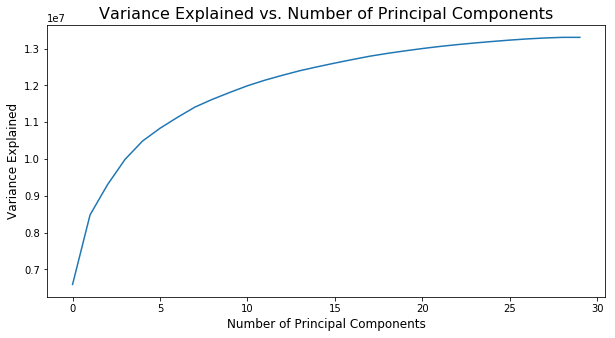

In [3]:
totalPCA_array = []
totalPCA = 0
for x in range(30):
    temp = pca.explained_variance_[x]
    totalPCA = totalPCA + temp
    totalPCA_array.append(totalPCA)
    
plt.figure(figsize=(10,5))
x = np.arange(30)
plt.plot(x,totalPCA_array)
plt.title("Variance Explained vs. Number of Principal Components",fontsize=16)
plt.xlabel("Number of Principal Components",fontsize=12)
plt.ylabel("Variance Explained",fontsize=12)


#### 2.3-Do you need all the vectors to represent the data? Discuss (3 points).

No, not all vectors are needed to represent the data. The eigenvectors that capture the most variation in the training vectors would also have larger corresponding variance_explained. Therefore, the eigenvectors with the largest variance_explained could represent the data relatively well. It can be observed from the graph that the total_varaince_explained starts to converge after the addition of about 20 principal components, indicating that all the principal components after the 20th one has little contribution to the total variance explained (because all principal components are organized in the descending order based on their corresponding variance_explained). As a result, using the first 20 principal components is probably sufficient to represent the data.

#### 2.4-For every sample, find the nearest neighbour (L2 distance), and check whether it is of the same class. What fraction of your data has a neighbour of the same class? Do this both in the original pixel space and the eigenspace, then compare the values; would you expect there to be a significant difference? (10 points).

In [4]:
# create an array of spaces
eig_spc = pca.transform(TrainingPicsFlatten)
spaces = [TrainingPicsFlatten, eig_spc]
neighbour = []

for space in range(2):
    # calculate Euclidean distance between the training images
    # each training image is compared with the rest 29 in the dataset
    dist = DistanceMetric.get_metric('euclidean')
    distance = dist.pairwise(spaces[space])
    
    # replace all zero values with max distance value to avoid matching the same image
    np.place(distance, distance==0, distance.max())
    
    # find the minimum distance along each row
    L2_dist = distance.min(1)

    # compare all Euclidean Distances with the minimum distance 
    # when a match is found, compare their indices and increment
    # number of neighbours/matches accordingly
    num_neighbour=0;
    for i in range(30):
        for j in range(30):
            if(distance[i][j]==L2_dist[i]):
                if(i//10==j//10):
                    num_neighbour = num_neighbour+1

    neighbour.append(num_neighbour/30)

print("PixelSpace:Fraction of data with nearest neighbours of same class = ", neighbour[0])
print("EigenSpace:Fraction of data with nearest neighbours of same class = ", neighbour[1])


PixelSpace:Fraction of data with nearest neighbours of same class =  0.8333333333333334
EigenSpace:Fraction of data with nearest neighbours of same class =  0.8333333333333334


#### Compare Fraction of Data in both PixelSpace and EigenSpace
As the values shown, we do not have much discrepancy between the fraction of data in PixelSpace and EigenSpace. This is to be expected because how the two spaces select the input data for Euclidean distance error calculation is similar.

In EigenSpace, we are mapping faces to eigenspace and obtain principal components which result in biggest variance and smallest reconstruction error. In PixelSpace, we are also selecting nearest neighbour based on smallest error. Hence, the fraction of data with nearest neighbour would be similar for both spaces  

### 3 - Face Detection and Identification
#### 3.1-Use a sliding window to detect whether a section of the image contains a face. Set a threshold on the distance in eigenspace between the window contents and your training data (15 points).

number of matched faces 3
position of matched faces [[60, 260], [60, 270], [60, 280]]


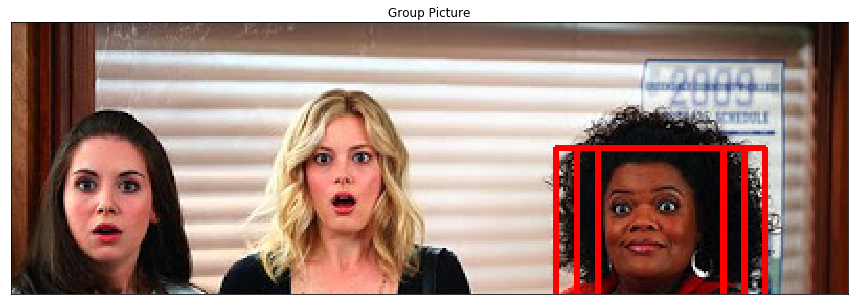

In [5]:
# use a sliding window to scan through group picture and save patches to a list
group_pic_path = './group_picture1.png'
group_pic_colour = cv2.imread(group_pic_path)
group_pic_colour = cv2.cvtColor(group_pic_colour, cv2.COLOR_BGR2RGB)
group_pic = cv2.imread(group_pic_path, cv2.IMREAD_GRAYSCALE);
group_pic = cv2.resize(group_pic,(400,150))

Dimx,Dimy = group_pic.shape
window_size = [80,80]
h,w = window_size

thresh = 4800  
step_size = 10
patches = []
patchPos = []
eigenface = []

#  create PCA object and compute the principal components in eigenspace
pca2 = PCA(n_components=30)
pca2.fit_transform(TrainingPicsFlatten)
eigVec = pca2.components_
avg = pca2.mean_

# use a sliding window to loop through the entire picture
for i in range(0, Dimx-h,step_size):
    for j in range(0, Dimy-w, step_size):
        patch = group_pic[i:i+h,j:j+w].flatten()   
        patches.append(patch)
        patchPos.append([i,j])       #save the position of the patches

# loop through all patches, compute coefficients and add them together
# to compute eigenface for each sliding window
for z in range(len(patches)):
    face_sum = 0
    for e in range(len(eigVec)):
        coeff = np.dot(patches[z]-avg, eigVec[e]) # coeff = dot(x-x(avg), eigVec)
        face = coeff*eigVec[e]
        face_sum = face + face_sum
    face_sum = face_sum + avg                     # face_sum = x(avg) + a1v1 + a2v2....
    face_sum = face_sum.flatten()
    eigenface.append(face_sum)

matchPos = []
dist1 = DistanceMetric.get_metric('euclidean')
distance1 = dist1.pairwise(eigenface,eigVec)
min_dist = distance1.min(1)

for d in range(min_dist.shape[0]):
    if min_dist[d]<thresh:
        matchPos.append(patchPos[d])

print("number of matched faces",len(matchPos))
print("position of matched faces",matchPos)

# draw box around the detected face
disp = group_pic_colour.copy()
        
for i in range(len(matchPos)):
    y,x = matchPos[i]
    cv2.rectangle(disp, (x, y), (x+w, y+h), (255, 0, 0), 2)

plt.figure(figsize=(15, 15))
plt.imshow(disp), plt.title('Group Picture')
plt.xticks([]), plt.yticks([])
plt.show()

#### 3.2-You will now try to recognize each of the people in the group image. For the windows in which a face is detected, map the window to your eigenspace and find the nearest neighbour from your data. Identity of the test case will be based on the identity of the closest person in the training set. 

#### For mis-identified faces, report the number of neighbours you need before getting the correct label (correct identification would use 1). 



In [6]:
eigenDist = distance1
match_index = []

# extract the x_position of matched faces
for i in range(len(matchPos)):
    index = matchPos[i][0]
    match_index.append(index)

# check index of the minimum_distance found for each matched face, 
# then based on this check which person it is
for d in range(len(match_index)):
    min_idx = np.argmin(eigenDist[d])
    if(min_idx//10 == 0):
        print("closest person at position ", matchPos[d], " is Annie(Left)")   #Lady on the left
    if(min_idx//10 == 1): 
        print("closest person at position ", matchPos[d], " is Britta(Middle)")  #Lady in the middle
    elif(min_idx//10 == 2):
        print("closest person at position ", matchPos[d], " is Shirley(Right)") #Lady on the right

# matched_dist stores the original Euclidean distance data, will be used later to obtain index
matched_dist = distance1[matchPos[0][0]]
matched_dist_copy = matched_dist.copy()

# sorted Euclidean distance from smallest to largest
matched_dist_copy.sort()

# Calculate how many neighbours are needed to get correct identification
for i in range(30):
    for j in range(30):
        if (matched_dist_copy[i] == matched_dist[j] and j!=0):
            matched_idx = j
            print("neighbour matched index = ",matched_idx)
            break
    if(matched_dist_copy[i] == matched_dist[j] and matched_idx//10==2):
        neighbour_needed = i
        break
        
print("number of neighbours needed to identify Shirley(Right Lady) = ", neighbour_needed) 

closest person at position  [60, 260]  is Annie(Left)
closest person at position  [60, 270]  is Annie(Left)
closest person at position  [60, 280]  is Annie(Left)
neighbour matched index =  7
neighbour matched index =  11
neighbour matched index =  16
neighbour matched index =  21
number of neighbours needed to identify Shirley(Right Lady) =  4


#### How well does the method work? How many false positive face detections do you get? For mis-identified faces, report the number of neighbours you need before getting the correct label (correct identification would use 1). In which situations would expect the approach to fail, and what could you do to improve it?

Generally speaking, the method does not work very well. Out of the 3 people in the picture, only 1 person has been suessfully detected. This is likely because the training images obtained are taken under different lighting conditions, with the people's faces in various orientations for the other two undetected people, while the training images for Shirley (lady on the right) are mostly taken from the front-view, making her easier to be identified.

3 matched faces are found for Shirley(Right), none of which is a false positive because her face is enclosed in all 3 windows. If each fase is only allowed to have 1 true positive, then the windows at (60,260) and (60,280) are more likely to be false positives because Shirley's face is not centered in those two windows. 

The number of nearest neighbours needed to identify Shirley's face is 4, as shown in the above code.

In situations where the people in the group picture have relatively similar traits (similar-sized eyes, mouth-shape, etc) and when the lighting condition of the group picture is dramatically different from that of the training images, this approach is likely to fail. To improve this algorithm, we could use more training images taken under similar environmental conditions with the test subjects' faces orientated in a similar position. We could also use SURF detector to compare keypoints of the training images to ensure that similar keypoints are found.

### 4 - Viola-Jones Comparison


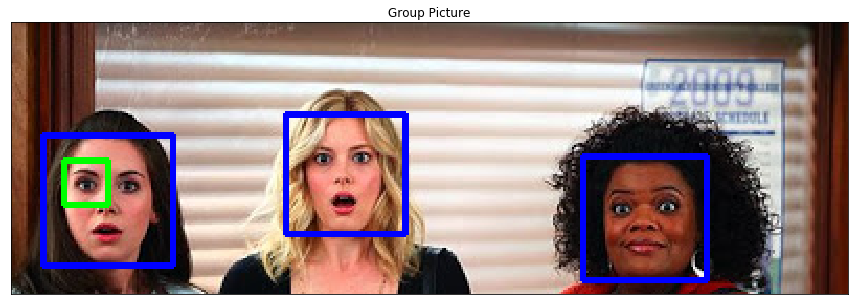

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

# Get OpenCV datapath
data_path = cv2.data.haarcascades
face_cascade = cv2.CascadeClassifier( os.path.join(data_path, 'haarcascade_frontalface_default.xml'))
eye_cascade = cv2.CascadeClassifier( os.path.join(data_path, 'haarcascade_eye.xml'))

img = cv2.imread('group_picture1.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# detect faces
# detectMultiScape(image, scaleFactor, minNeighbors)
# scaleFactor - parameter specifying how much the image size is reduced
#  at each image scale
# minNeighbors - parameter specifying how many neighbors each candidate
#  rectangle should have to retain
faces = face_cascade.detectMultiScale(img_gray, 1.1,2)
for (x,y,w,h) in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
    roi_gray = img_gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 2)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh), (0,255,0), 2)

# display images
plt.figure(figsize=(15,15))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Group Picture"), plt.xticks([]), plt.yticks([])
plt.show()

#### Use an existing implementation of the Viola-Jones face detector, and compare the results with your detector (e.g. how many false positives do you obtain?). Under what conditions would you expect the Viola-Jones detector to work when PCA does not? (5 points).

The Viola-Jones detector produced no false positives, while the PCA detector produced 2 or 0 false-positives based on how we define false-positives as discussed in the section above. 

Since the Viola-Jones detector is a scale invariant detector, we would expect it to work better than PCA when the faces in the picture are of different sizes (people standing at various distances). PCA is also very sensitive towards lighting conditions and faces with various orientation, hence, Viola-Jones would probably work better under those situations as well.